# Example 5A: Classification with Linear Regression and One-Hot Encoding

A fundamental problem with ordinal encoding is that it imposes an order on the categories. Not all categories have an order to them, so it would be incorrect for a case that is ambiguous between class 0 and class 2 to be categorized as class 1. 

One-hot encoding allows us to avoid this issue. 

## How It Works

1. **Identify Unique Categories**: Determine all unique categories within the categorical variable.
2. **Create Binary Vectors**: For each category, identify a dimension in a vector. 
3. **Encode Presence of Category**: If a label corresponds to a dimension, place a `1` in that dimension of the vector. For all other entries in the vector, place a `0`.

## Example

Consider a "Color" column with values Red, Blue, and Green.

- Original Data and Encoding:

  | Color | One-Hot Representation |
  |-------|-------|
  | Red   | [1, 0, 0] |
  | Blue  | [0, 1, 0] |
  | Green | [0, 0, 1] |
  | Red   | [1, 0, 0] |


## Advantages

- **ML Algorithm Compatibility**: Transforms categorical data into a machine learning-friendly numeric format.
- **Interpretability**: The encoded data format is clear and easy to understand.

## Considerations

- **Increased Dimensionality**: May significantly expand the number of features in the dataset.
- **Sparse Matrix**: Results in a matrix mostly filled with zeros, which can be storage and computation inefficient.

In [1]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

# Required for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

We will use a very similar dataset as Example 5a.

In [2]:
np.random.seed(5)

# Generate synthetic data
size_per_class = 100
x1_0 = np.random.uniform(0, 5, size_per_class) + np.random.normal(0, 1, 100)
x2_0 = np.random.uniform(0, 10, size_per_class)

x1_1 = np.random.uniform(5, 10, size_per_class) + np.random.normal(0, 1, 100)
x2_1 = np.random.uniform(0, 10, size_per_class)

x1_2 = np.random.uniform(10, 15, size_per_class) + np.random.normal(0, 1, 100)
x2_2 = np.random.uniform(0, 10, size_per_class)

# Combine data
x1 = np.concatenate([x1_0, x1_1, x1_2])
x2 = np.concatenate([x2_0, x2_1, x2_2])
y = np.array([0]*size_per_class + [1]*size_per_class + [2]*size_per_class)

# Create DataFrame
data = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y})

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data[['X1', 'X2']], data['Y'], test_size=0.2, random_state=5)

Scikit-Learn makes one-hot encoding a straightforward process. 

In [3]:
# One-Hot Encoding the target variable
encoder = OneHotEncoder(sparse_output=False)
Y_train_encoded = encoder.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_encoded = encoder.transform(Y_test.values.reshape(-1, 1))

A side effect of using a one-hot encoding means that we are performing linear regression for each dimension in the vectors. That is, we perform linear regression for every category where each regression determines if a point is or is not in the category. 

In [4]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train_encoded)

# Compute coefficients
coef = model.coef_
intercept = model.intercept_
print(coef)
print(intercept)

[[-0.08867408 -0.00321765]
 [ 0.0071617   0.006935  ]
 [ 0.08151238 -0.00371735]]
[ 0.99874339  0.26729511 -0.2660385 ]


Despite the several functions, prediction is very straightforward. 

In [5]:
# Predict on the testing set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

As with example 5A, we can compute a confusion matrix and look at both precision and recall. Notice that we do not perform as well as our other model in 5A. What are some reasons why this may be happening?

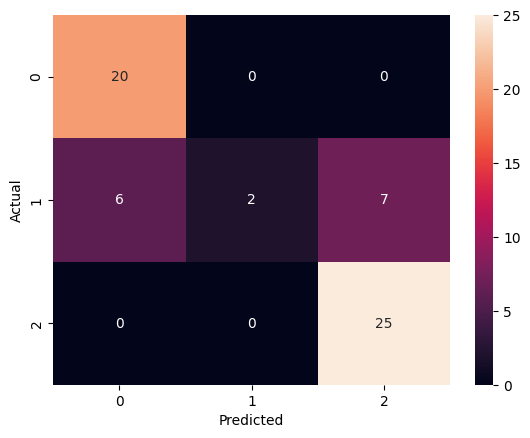

Accuracy: 0.7833333333333333
Macro Precision: 0.8501602564102564
Macro Recall: 0.7111111111111111
Weighted Precision: 0.8319310897435898
Weighted Recall: 0.7833333333333333
Micro Precision: 0.7833333333333333
Micro Recall: 0.7833333333333333


In [6]:
# Calculate confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred_classes, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(Y_test, Y_pred_classes)
print(f'Accuracy: {accuracy}')

precision_macro = precision_score(Y_test, Y_pred_classes, average='macro')
recall_macro = recall_score(Y_test, Y_pred_classes, average='macro')

precision_weighted = precision_score(Y_test, Y_pred_classes, average='weighted')
recall_weighted = recall_score(Y_test, Y_pred_classes, average='weighted')

precision_micro = precision_score(Y_test, Y_pred_classes, average='micro')
recall_micro = recall_score(Y_test, Y_pred_classes, average='micro')

print(f'Macro Precision: {precision_macro}')
print(f'Macro Recall: {recall_macro}')
print(f'Weighted Precision: {precision_weighted}')
print(f'Weighted Recall: {recall_weighted}')
print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')

Just as before, we can plot the classification and see how it holds up against the testing set. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


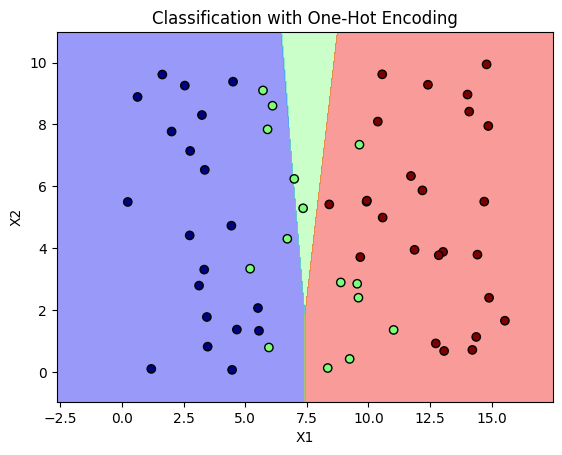

In [7]:
# Setting up the meshgrid for plotting decision boundaries
x1_min, x1_max = data['X1'].min() - 1, data['X1'].max() + 1
x2_min, x2_max = data['X2'].min() - 1, data['X2'].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict on meshgrid
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = np.argmax(Z, axis=1).reshape(xx1.shape)

# Plot decision boundaries and data points
plt.contourf(xx1, xx2, Z, alpha=0.4, levels=np.arange(-0.5, 2.5, 0.5), cmap=plt.cm.jet)
plt.scatter(X_test['X1'], X_test['X2'], c=Y_test, edgecolors='k', cmap=plt.cm.jet)
plt.title("Classification with One-Hot Encoding")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Notice in the above graph that the decision boundaries are nontrivial. How do we solve for these lines? The concept is the same: we look for cases where classification is ambiguous. This happens when two classes are of equal weight. Remember, we pick the class based on which dimension contains the highest value in the prediction. 

Below, we compute each linear regression for each category. We then solve for the decision boundary by solve for the cases when the regression lines give rise to an equal value. These lines are them plotted. 

In [8]:
A = coef[0].tolist()
A.insert(0,intercept[0].tolist())

B = coef[1].tolist()
B.insert(0,intercept[1].tolist())

C = coef[2].tolist()
C.insert(0,intercept[2].tolist())

def plug_in(lin_fun:list, point:tuple) -> float:
    return lin_fun[0] + lin_fun[1]*point[0] + lin_fun[2]*point[1]


def decision_boundary(fun1:list, fun2:list) -> list:
    return list(map(lambda x, y: x - y, fun1, fun2))

ab = decision_boundary(A, B)
ac = decision_boundary(A, C)
bc = decision_boundary(B, C)

print("0-1 Decision Boundary Coefficients", ab)
print("0-2 Decision Boundary Coefficients", ac)
print("1-2 Decision Boundary Coefficients", bc)

0-1 Decision Boundary Coefficients [0.7314482837331956, -0.09583578283056482, -0.010152650912972608]
0-2 Decision Boundary Coefficients [1.2647818862701774, -0.17018646667572485, 0.0004996920962561553]
1-2 Decision Boundary Coefficients [0.5333336025369818, -0.07435068384516003, 0.010652343009228763]


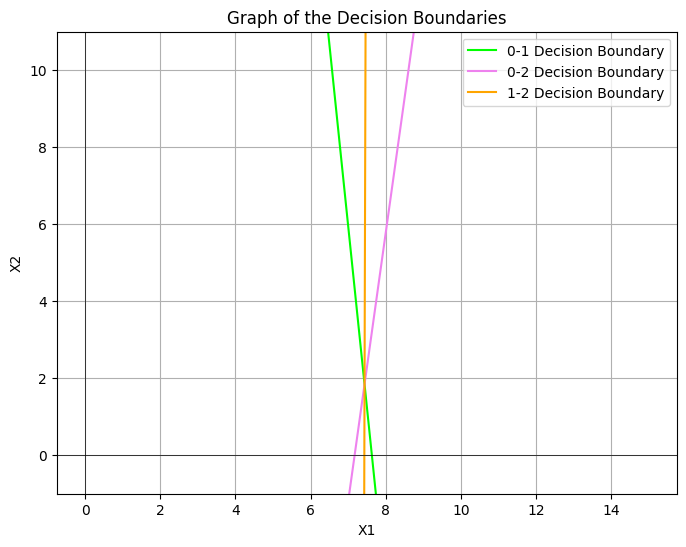

In [9]:
# Define the range for X1
x1 = np.linspace(0, 15, 400)

# Define the equations
# Rearranging each equation to solve for X2
x2_1 = (ab[1] * x1 + ab[0]) / (-ab[2])
x2_2 = (bc[1] * x1 + bc[0]) / (-bc[2])
x2_3 = (ac[1] * x1 + ac[0]) / (-ac[2])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_1, label='0-1 Decision Boundary', color='lime')
plt.plot(x1, x2_2, label='0-2 Decision Boundary', color='violet')
plt.plot(x1, x2_3, label='1-2 Decision Boundary', color='orange')

# Setting X2 axis limits
plt.ylim(-1, 11)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Graph of the Decision Boundaries')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

There are portions where the lines are irrelevant because they correspond to values lower than a neighboring line. This is why the lines appear in more places than the actual decision boundary of our previous plot. 

## Remark

It is important to note that the model presented here could be improved upon. Why do we know this to be true and what would you do to improve it? 